#Predictive Analytics - Crop Recommendation

Nama: Atika Oktavianti

Username: atika_oktavianti_0gNF

Domain yang saya pilih untuk proyek machine learning ini adalah Pertanian, dengan judul Rekomendasi jenis tanaman berdasarkan kondisi lingkungan.

**Mengunduh dataset dari kaggle**

In [ ]:
# Memasang Kaggle API
!pip install -q kaggle

In [ ]:
# Upload file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"atikaoktavianti","key":"e7054724caf6c127e3e103ea57b1f37c"}'}

In [ ]:
# Mengunduh dataset dari Kaggle
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 180MB/s]


In [ ]:
# Mengekstrak file zip
!unzip -q crop-recommendation-dataset.zip

#Import Library

Mengimport library yang dibutuhkan

In [ ]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk modelling dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#Load Dataset

Memuat dataset yang sudah diunduh dari kaggle

In [ ]:
# Menampilkan semua kolom
pd.set_option('display.max_columns', None)
# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Tampilkan 5 baris pertama
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Output tersebut merupakan cuplikan awal dari dataset rekomendasi tanaman (Crop Recommendation Dataset). Dataset ini berisi informasi tentang kondisi lingkungan dan unsur hara tanah yang digunakan untuk memprediksi jenis tanaman (label) yang cocok ditanam.

#Eksplorasi Data Awal (EDA) dan Visualisasi Data

Melihat jumlah baris dan kolom pada dataset

In [ ]:
# Ukuran dataset
print(f"Jumlah baris dan kolom: {df.shape}")

Jumlah baris dan kolom: (2200, 8)


pada output tersebut terdapat 2200 baris dan 8 kolom

In [ ]:
# Informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# Statistik deskriptif
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Output tersebut menunjukkan ringkasan statistik dari fitur numerik dalam dataset. Rata-rata suhu adalah 25.62°C, kelembaban 71.48%, pH tanah 6.47, dan curah hujan 103.46 mm. Kandungan unsur hara N, P, dan K masing-masing rata-rata 50.55, 53.36, dan 48.15. Nilai minimum dan maksimum tiap fitur menunjukkan variasi data yang cukup besar, yang penting untuk mendukung model klasifikasi tanaman.

**Mengecek missing value**

Pengecekan missing value penting dilakukan untuk memastikan kualitas data sebelum analisis atau pelatihan model, karena data yang hilang dapat menyebabkan bias atau error.

In [ ]:
#Cek missing values
print("Jumlah missing value di setiap kolom:")
print(df.isnull().sum())

Jumlah missing value di setiap kolom:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


Output di atas menunjukkan bahwa tidak ada missing value di semua kolom (jumlahnya 0), sehingga dataset ini sudah bersih dan siap digunakan untuk proses selanjutnya tanpa perlu penanganan khusus terhadap data yang hilang.










**Mengecek Jumlah Target (jenis tanaman)**

Pengecekan jumlah target tanaman penting untuk memahami cakupan klasifikasi yang akan dilakukan.

In [ ]:
# Jumlah kelas target
print("Jumlah kelas tanaman unik:", df['label'].nunique())
print("\nDaftar jenis tanaman:")
print(df['label'].unique())

Jumlah kelas tanaman unik: 22

Daftar jenis tanaman:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


Output menunjukkan bahwa terdapat 22 kelas tanaman unik dalam dataset. Informasi ini membantu memastikan bahwa model akan belajar membedakan berbagai jenis tanaman berdasarkan kondisi lingkungan yang beragam.

**Visualisasi distribusi label tanaman**

Visualisasi ini agar dapat menunjukkan distribusi jumlah data untuk setiap jenis tanaman dalam dataset.

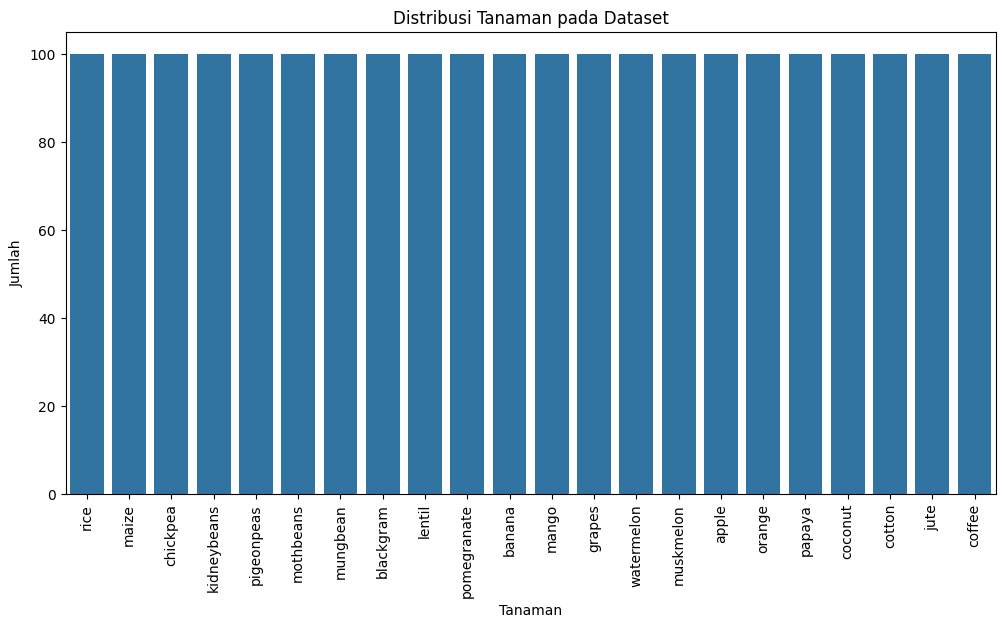

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribusi Tanaman pada Dataset')
plt.xlabel('Tanaman')
plt.ylabel('Jumlah')
plt.show()

Dapat dilihat pada distribusi tersebut bahwa Setiap tanaman memiliki jumlah yang sama rata, yaitu sekitar 100 data per kelas. Hal ini menandakan bahwa dataset seimbang (balanced), sehingga model tidak akan bias terhadap kelas tertentu saat dilatih, yang merupakan kondisi ideal untuk klasifikasi.

**Korelasi antar fitur**

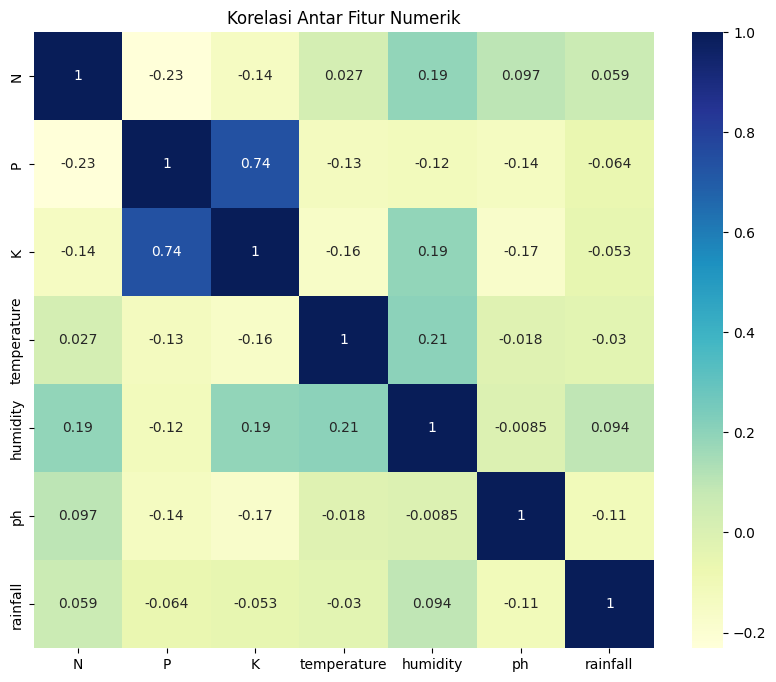

In [ ]:
plt.figure(figsize=(10, 8))

# Pilih hanya kolom numerik untuk korelasi
numerical_features = df.select_dtypes(include=[np.number])

sns.heatmap(numerical_features.corr(), annot=True, cmap='YlGnBu')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

Heatmap pada gambar menunjukkan **korelasi antar fitur numerik** dalam dataset. Terlihat bahwa fitur **P (fosfor)** dan **K (kalium)** memiliki korelasi cukup tinggi (0.74), artinya keduanya cenderung meningkat atau menurun bersama. Sementara fitur lain seperti suhu, kelembaban, pH, dan curah hujan memiliki korelasi rendah satu sama lain, menunjukkan bahwa sebagian besar fitur bersifat **independen**. Hal ini baik untuk model karena mengurangi risiko multikolinearitas dan memberikan informasi yang lebih beragam.


#Preprocessing Data

**Encoding Label**

Encoding label dilakukan supaya data kategori diubah jadi angka agar model machine learning bisa memprosesnya.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Inisialisasi label encoder
le = LabelEncoder()

# Encode kolom label
df['label_encoded'] = le.fit_transform(df['label'])

# Fitur dan target
X = df.drop(columns=['label', 'label_encoded'])
y = df['label_encoded']

In [ ]:
# Informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              2200 non-null   int64  
 1   P              2200 non-null   int64  
 2   K              2200 non-null   int64  
 3   temperature    2200 non-null   float64
 4   humidity       2200 non-null   float64
 5   ph             2200 non-null   float64
 6   rainfall       2200 non-null   float64
 7   label          2200 non-null   object 
 8   label_encoded  2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


pada output di atas dapat dilihat bahwa Dataframe ini berisi 2200 baris dengan 9 kolom, termasuk data numerik seperti `N`, `P`, `K`, `temperature`, dan data kategorikal pada kolom `label`. Kolom `label` sudah diubah menjadi angka pada kolom `label_encoded` melalui encoding. Semua data lengkap tanpa nilai kosong.


**Split data**

Data di-split supaya model dilatih pada data train dan diuji pada data test untuk mengukur performa model secara objektif.

In [ ]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran data train: {X_train.shape}")
print(f"Ukuran data test: {X_test.shape}")

Ukuran data train: (1760, 7)
Ukuran data test: (440, 7)


Output menunjukkan data train berisi 1760 baris dan data test 440 baris, dengan 7 fitur di masing-masing, sesuai proporsi split 80:20.


#Modelling dan Evaluasi

Pada tahap modelling dan evaluasi ini menggunakan tiga algoritma untuk perbandingan performanya yaitu Random Forest, XGBoost, dan SVM.

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluasi Model Random Forest**

=== Random Forest ===
Accuracy: 0.9954545454545455
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
      

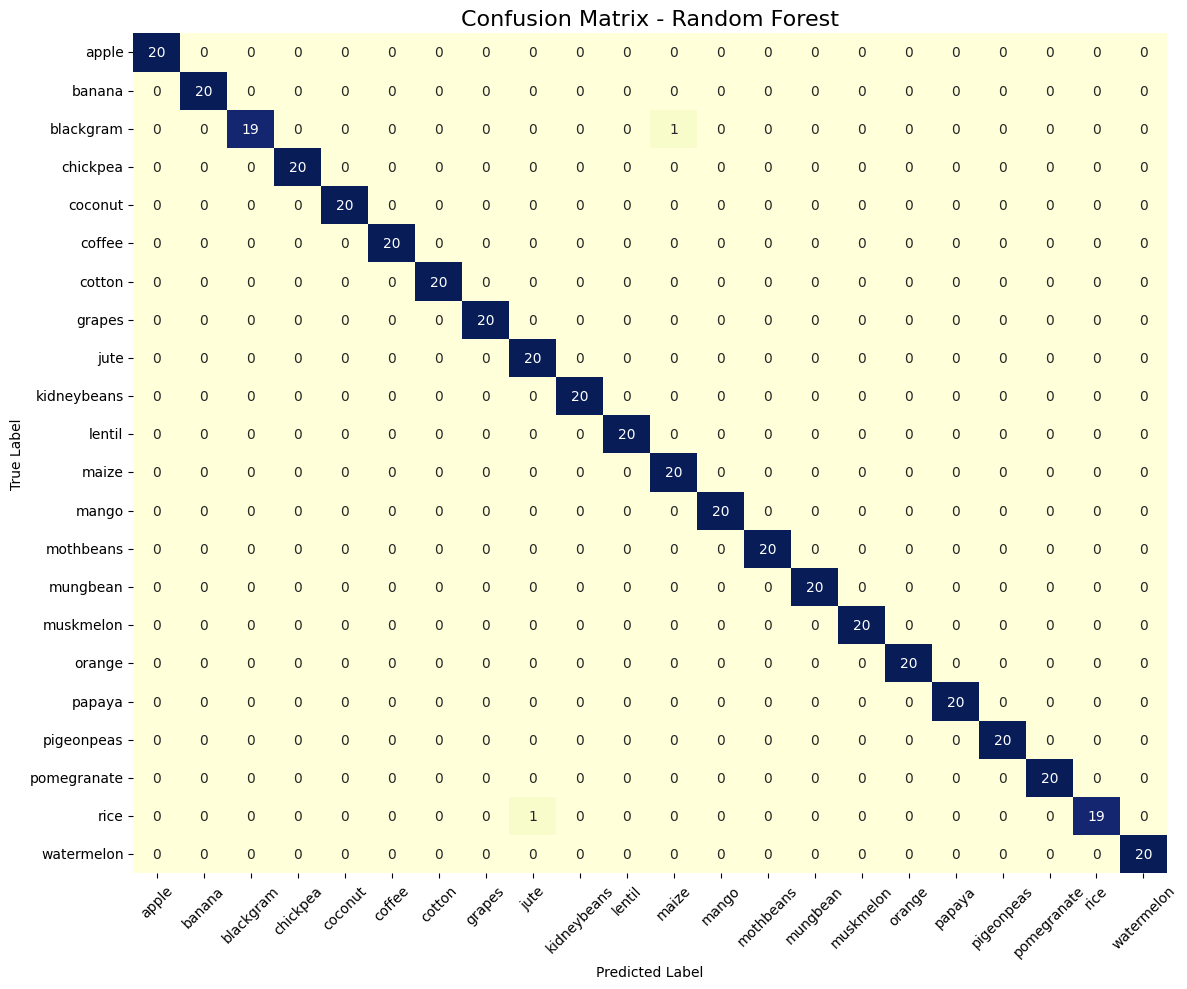

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi teks
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest", fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Model Random Forest berhasil mencapai akurasi sangat tinggi sebesar 99,55% pada data uji. Dari classification report terlihat bahwa hampir semua kelas memiliki precision, recall, dan f1-score mendekati 1, menunjukkan performa model yang sangat baik dan konsisten dalam mengklasifikasikan setiap kelas dengan akurat. Hanya beberapa kelas kecil seperti kelas 2, 8, 11, dan 20 yang memiliki nilai recall atau precision sedikit di bawah 1, tapi tetap sangat baik. Secara keseluruhan, model ini sangat efektif dalam mengenali pola pada data dan menghasilkan prediksi yang akurat.

**XGBoost**

In [ ]:
!pip install xgboost --quiet

In [ ]:
from xgboost import XGBClassifier

# Inisialisasi tanpa use_label_encoder
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

**Evaluasi Model XCBoost**

=== XGBoost Classifier ===
Accuracy: 0.9931818181818182
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      0.90      0.95        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.95      1.00      0.98        20
          14       0.95      1.00      0.98        20
          15       1.00      1.00      1.00        20
 

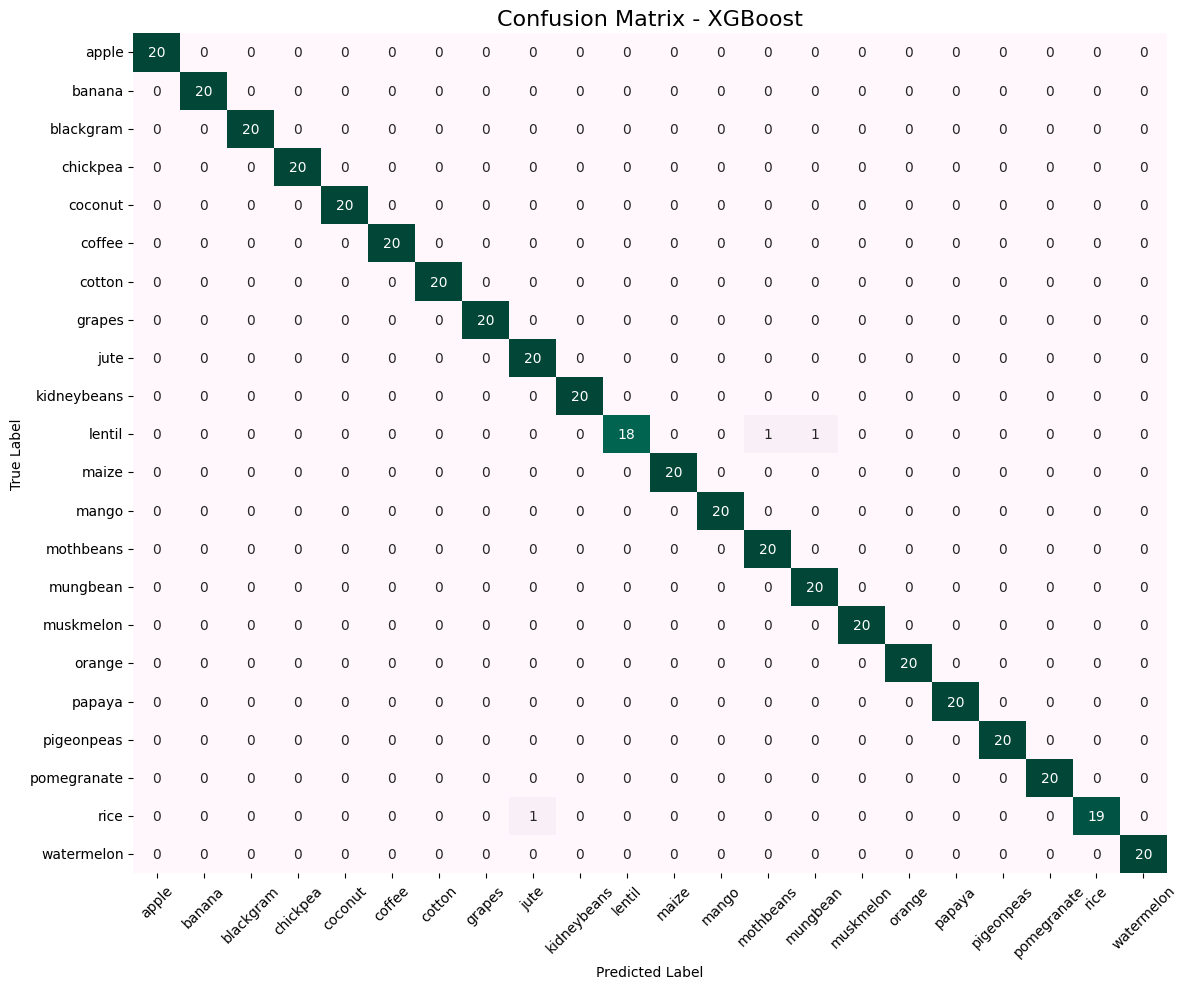

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_xgb = xgb.predict(X_test)

print("=== XGBoost Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="PuBuGn", cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost", fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Model XGBoost berhasil mencapai akurasi tinggi sebesar 99,32% pada data uji. Dari classification report terlihat bahwa sebagian besar kelas memiliki precision, recall, dan f1-score mendekati 1, menandakan performa model yang sangat baik dalam mengklasifikasikan setiap kelas dengan tepat. Beberapa kelas seperti kelas 8, 10, 13, 14, dan 20 menunjukkan nilai recall atau precision sedikit di bawah 1, namun tetap sangat baik dan tidak signifikan menurunkan kualitas prediksi. Secara keseluruhan, model XGBoost menunjukkan efektivitas tinggi dalam mengenali pola data dan memberikan prediksi yang akurat.

**SVM (Support Vector Machine)**

In [ ]:
from sklearn.svm import SVC

# Inisialisasi model
svm_model = SVC(random_state=42)

# Training
svm_model.fit(X_train, y_train)

SVC(random_state=42)

**Evaluasi Model SVM**

=== Support Vector Machine ===
Accuracy: 0.9840909090909091
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.80      1.00      0.89        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        

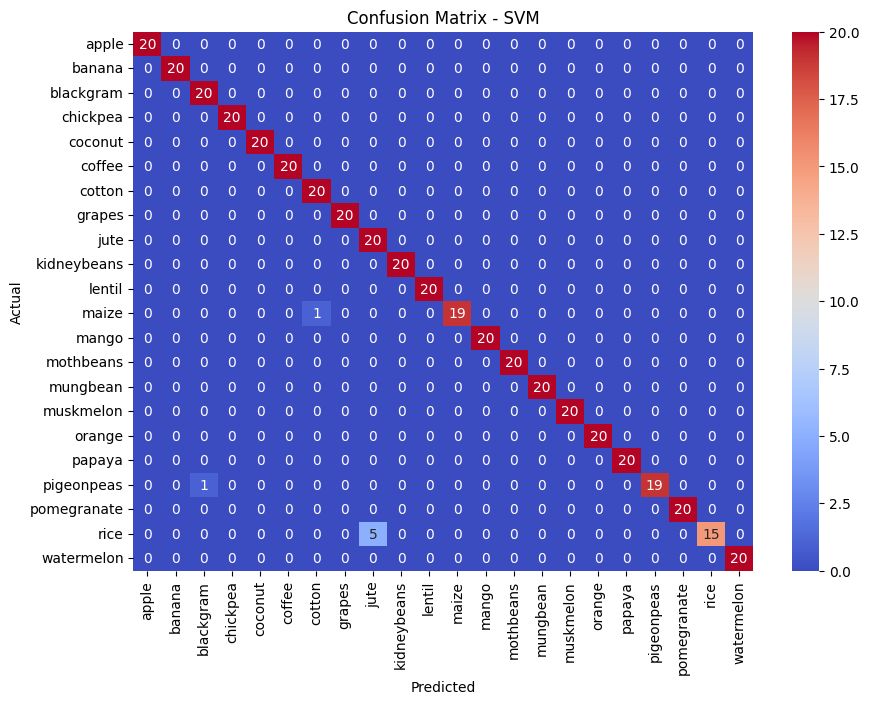

In [ ]:
# Prediksi dan evaluasi
y_pred_svm = svm_model.predict(X_test)

print("=== Support Vector Machine ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=le.classes_))

# Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Support Vector Machine (SVM) mencapai akurasi sebesar 98,41% pada data uji, menunjukkan performa yang sangat baik. Dari classification report, mayoritas kelas memiliki precision, recall, dan f1-score yang mendekati 1, menandakan model mampu mengklasifikasikan sebagian besar kelas dengan tepat. Namun, beberapa kelas seperti jute dan rice memiliki recall yang lebih rendah (masing-masing 1.00 dan 0.75), yang berarti model kurang optimal dalam mendeteksi semua sampel kelas tersebut. Meskipun begitu, secara keseluruhan, model SVM tetap efektif dan menghasilkan prediksi yang akurat dengan sedikit penurunan performa pada beberapa kelas tertentu.

**Perbandingan ketiga algorima (Random forest, XGBoost dan SVM**

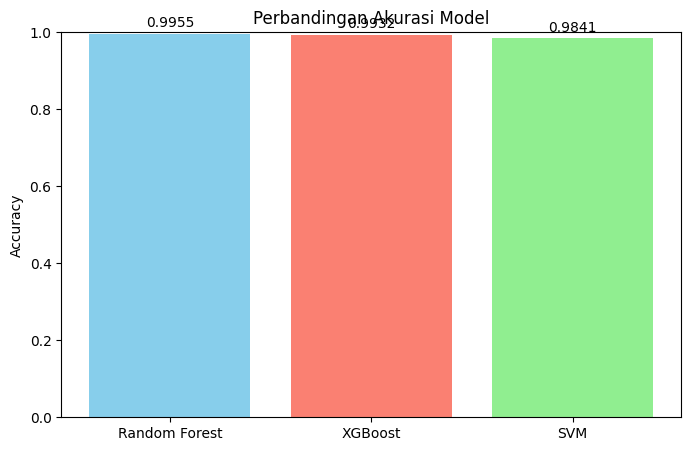

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train model SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Hitung akurasi ketiga model
acc_rf = accuracy_score(y_test, rf.predict(X_test))
acc_xgb = accuracy_score(y_test, xgb.predict(X_test))
acc_svm = accuracy_score(y_test, svm_model.predict(X_test))

# Data untuk plot
models = ['Random Forest', 'XGBoost', 'SVM']
accuracies = [acc_rf, acc_xgb, acc_svm]

# Plot diagram batang
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')

# Tambahkan nilai akurasi di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', va='bottom')

plt.show()

1. Semua model memiliki performa sangat tinggi, dengan akurasi di atas 98%, menandakan bahwa dataset kemungkinan bersih, seimbang, dan mudah dipisahkan antar kelas.
2. Random Forest menghasilkan akurasi tertinggi (99.55%), sedikit lebih baik dari XGBoost dan SVM.
3. XGBoost sangat mendekati Random Forest, dengan selisih hanya 0.23%. Ini menunjukkan bahwa keduanya bekerja sangat baik untuk dataset ini.
4. SVM sedikit di bawah dua model lainnya, namun tetap dengan akurasi sangat baik.